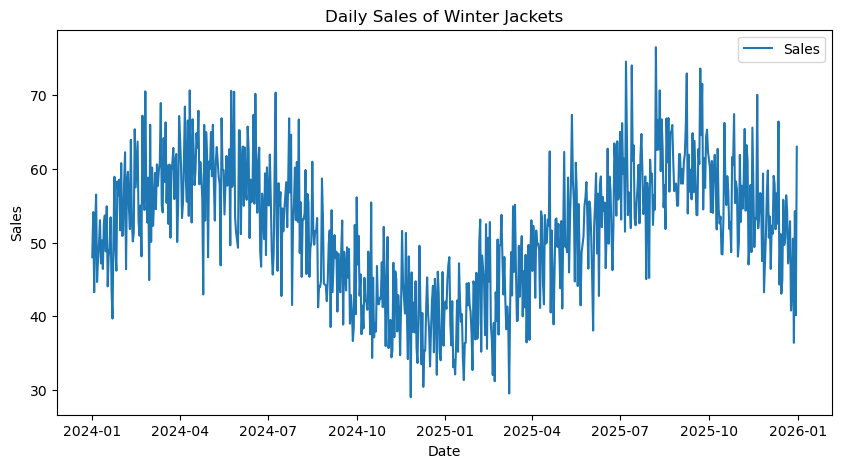

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate synthetic sales data (simulating daily sales of winter jackets)
# np.random.seed is used to make the random numbers reproducible
np.random.seed(42)
dates = pd.date_range('2024-01-01', '2025-12-31', freq='D')  # Generate a daily date range
sales_data = np.random.poisson(lam=30, size=len(dates)) + np.sin(np.linspace(0, 3 * np.pi, len(dates))) * 10 + 20

# Create a DataFrame with the generated data
df_sales = pd.DataFrame({'Date': dates, 'Sales': sales_data})
df_sales.set_index('Date', inplace=True)  # Set Date as the index for time series

# Visualize the sales data
plt.figure(figsize=(10, 5))
plt.plot(df_sales.index, df_sales['Sales'], label='Sales')
plt.title('Daily Sales of Winter Jackets')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\Users\Triumph Digital\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


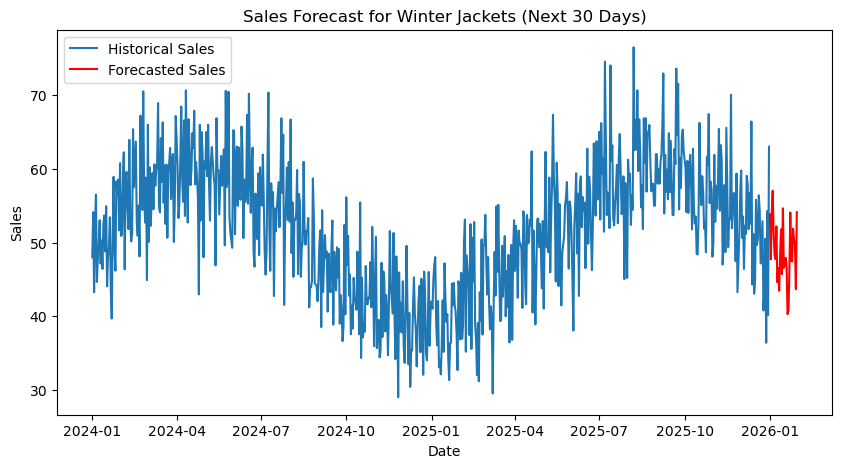

In [10]:
# Forecasting future sales (next 30 days) using Holt-Winters method
# ExponentialSmoothing includes trend and seasonal components for better forecasting
model = ExponentialSmoothing(df_sales['Sales'], trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(df_sales.index, df_sales['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_sales.index[-1], periods=31, freq='D')[1:], forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Winter Jackets (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()